In [41]:
pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-macosx_10_12_x86_64.whl (7.9 MB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_10_9_x86_64.whl (65 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl (265 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached fonttools-4.56.0-cp39-cp39-macosx_10_9_x86_64.whl (2.3 MB)
  Using cached pillow-11.1.0-cp39-cp39-macosx_10_10_x86_64.whl (3.2 MB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
You should consider upgrading via the '/Users/riddhishah/Documents/GitHub/Intelligent_tab_organizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [36]:
from flask import Flask, request, jsonify
from flask_cors import CORS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import logging
from sklearn.decomposition import TruncatedSVD
import numpy as np
from collections import Counter
import nltk
import spacy
from sklearn.decomposition import LatentDirichletAllocation
from transformers import pipeline
from nltk.corpus import stopwords
import re
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

In [42]:
titles = ['Riddhi, apply now to ‘AI Data Engineer at Kinaxis’ - riddhishah2103@gmail.com - Gmail', 'AI Data Engineer | Kinaxis | LinkedIn', 'Top job picks for you | LinkedIn', 'Cisco Jobs', 'Inbox (840) - riddhikshah21@gmail.com - Gmail', 'Leetcode - Google Sheets', 'Subsets - NeetCode', 'Path Sum - LeetCode', 'RFE Feature Selection Explanation', 'Provide list of ideas for building a chrome extension. The project should be AI powered and can be used as a chrome extension', 'RiddhiShahResume - Online LaTeX Editor Overleaf', 'Top 5 Large Vision Models: Use Cases & Challenges in 2025', 'Sign Language to Text Conversion System - Claude', 'How I “Cheated” My Way Into FAANG Interviews and Got the Offer : r/leetcode', 'Interview Question - LeetCode Discuss', 'INJURY | Gaurav Kapoor | Stand Up Comedy - YouTube', 'Feed | LinkedIn', 'Riddhikshah21/Intelligent_tab_organizer: A Chrome extension frontend implemented using React and backend implemented using Flask', 'WhatsApp', 'semantic meaning tabs name groups name ai - Google Search', 'LatentDirichletAllocation — scikit-learn 1.6.1 documentation', 'React App', 'categorize titles into groups categories - Google Search', 'zero shot classification hugging face - Google Search']

/Users/riddhishah/Documents/GitHub/Intelligent_tab_organizer/venv/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


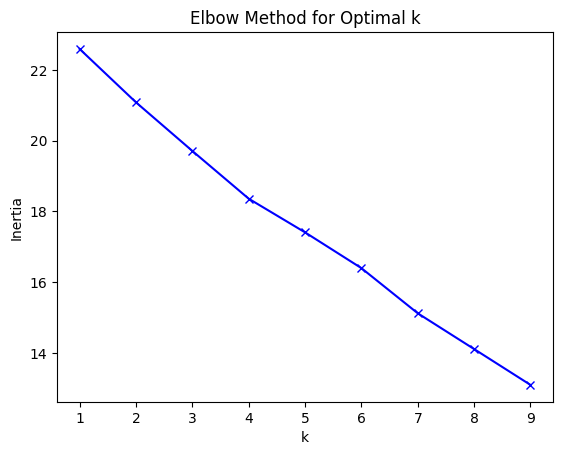


Cluster 0:
- RFE Feature Selection Explanation

Cluster 1:
- semantic meaning tabs name groups name ai - Google Search
- categorize titles into groups categories - Google Search
- zero shot classification hugging face - Google Search

Cluster 2:
- AI Data Engineer | Kinaxis | LinkedIn
- Top job picks for you | LinkedIn
- Provide list of ideas for building a chrome extension. The project should be AI powered and can be used as a chrome extension
- Feed | LinkedIn

Cluster 3:
- Leetcode - Google Sheets
- Path Sum - LeetCode
- How I “Cheated” My Way Into FAANG Interviews and Got the Offer : r/leetcode
- Interview Question - LeetCode Discuss

Cluster 4:
- Riddhi, apply now to ‘AI Data Engineer at Kinaxis’ - riddhishah2103@gmail.com - Gmail
- Cisco Jobs
- Inbox (840) - riddhikshah21@gmail.com - Gmail
- Subsets - NeetCode
- RiddhiShahResume - Online LaTeX Editor Overleaf
- Top 5 Large Vision Models: Use Cases & Challenges in 2025
- Sign Language to Text Conversion System - Claude
- INJURY |

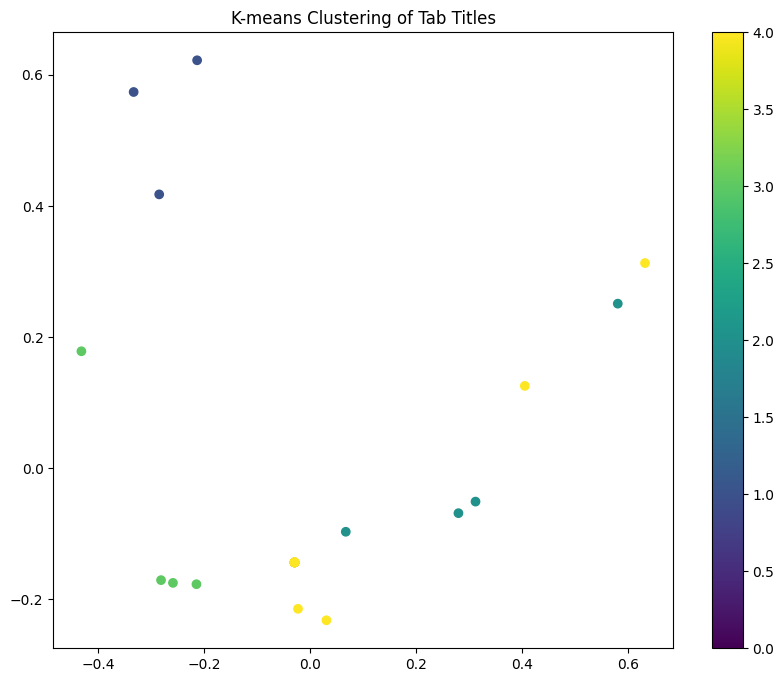

In [43]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Convert titles to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(titles)

# Determine optimal number of clusters using the elbow method
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal k (let's say it's 5 for this example)
optimal_k = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Add cluster labels to titles
clustered_titles = list(zip(titles, kmeans.labels_))

# Print clustered titles
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    for title, label in clustered_titles:
        if label == i:
            print(f"- {title}")

# Visualize clusters in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering of Tab Titles')
plt.colorbar(scatter)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

def density_based_labeling(titles, eps=0.5, min_samples=2):
    # Convert titles to TF-IDF vectors
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(titles)

    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X)
    print(cluster_labels)
    # Generate labels for each cluster
    cluster_names = {}
    for cluster_id in set(cluster_labels):
        if cluster_id != -1:  # Ignore noise points
            cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
            cluster_titles = [titles[i] for i in cluster_indices]
            
            # Extract most common words in the cluster
            words = [word for title in cluster_titles for word in title.split()]
            common_words = Counter(words).most_common(3)
            
            # Create cluster name from common words
            cluster_name = ' '.join([word for word, _ in common_words])
            print(cluster_name)
            cluster_names[cluster_id] = cluster_name

    return cluster_labels, cluster_names

# Example usage
# titles = [
#     "AI Data Engineer job opportunity",
#     "Machine learning tutorial",
#     "Data science career paths",
#     "Python programming basics",
#     "Natural language processing techniques",
#     "Job interview tips for tech roles",
#     "Deep learning frameworks comparison"
# ]

labels, names = density_based_labeling(titles)

for i, (title, label) in enumerate(zip(titles, labels)):
    if label != -1:
        print(f"Title: {title}")
        print(f"Cluster: {label} - {names[label]}\n")
    else:
        print(f"Title: {title}")
        print("Cluster: Noise\n")


[-1 -1 -1 -1 -1 -1 -1]
Title: AI Data Engineer job opportunity
Cluster: Noise

Title: Machine learning tutorial
Cluster: Noise

Title: Data science career paths
Cluster: Noise

Title: Python programming basics
Cluster: Noise

Title: Natural language processing techniques
Cluster: Noise

Title: Job interview tips for tech roles
Cluster: Noise

Title: Deep learning frameworks comparison
Cluster: Noise



In [26]:
vectorizer = TfidfVectorizer(
            stop_words='english',
            min_df=1,
            max_df=0.9,
            ngram_range=(1, 2)
        )
use_nlp = True
if use_nlp:
    try:
        nlp = spacy.load("en_core_web_sm")
    except:
        print("Downloading spaCy model...")
        import subprocess
        subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
        nlp = spacy.load("en_core_web_sm")

# Dictionary of known categories with relevant keywords
category_keywords = {
    "Tech & Programming": ["python", "javascript", "programming", "code", "github", "stack overflow", 
                            "developer", "software", "web development", "tutorial", "api", "coding"],
    "News & Media": ["news", "cnn", "bbc", "nytimes", "reuters", "article", "breaking", "report"],
    "Social Media": ["facebook", "twitter", "instagram", "linkedin", "social", "youtube", "tiktok"],
    "Shopping": ["amazon", "shopping", "buy", "shop", "product", "price", "deal", "cart", "order"],
    "Education": ["course", "learn", "study", "university", "college", "education", "academy", 
                    "tutorial", "lecture", "lesson", "udemy", "coursera"],
    "Finance": ["finance", "stock", "invest", "banking", "money", "budget", "loan", "credit", 
                "financial", "trading", "portfolio", "crypto", "cryptocurrency"],
    "Entertainment": ["netflix", "movie", "film", "show", "stream", "watch", "episode", "series", 
                        "entertainment", "disney", "hulu", "youtube", "music", "spotify", "song"],
    "Travel": ["travel", "flight", "hotel", "booking", "trip", "vacation", "destination", "airbnb"],
    "Health & Fitness": ["health", "fitness", "workout", "exercise", "diet", "nutrition", "medical"],
    "Food & Cooking": ["recipe", "food", "cooking", "restaurant", "meal", "diet", "ingredient", "dish"],
    "Documentation": ["docs", "documentation", "reference", "manual", "guide", "api"],
    "Research": ["research", "paper", "study", "analysis", "journal", "science", "data", "findings"]
}

In [27]:
def extract_keywords(titles):
    """Extract important keywords using NLP if enabled"""
    if use_nlp:
        return titles
        
    keywords_list = []
    for title in titles:
        doc = nlp(title)
        # Extract nouns, verbs, and proper nouns as important keywords
        keywords = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN", "VERB"] and not token.is_stop]
        # Add named entities
        entities = [ent.text for ent in doc.ents]
        # Combine and deduplicate
        all_keywords = list(set(keywords + entities))
        keywords_list.append(" ".join(all_keywords))
        
    return keywords_list

def match_predefined_categories(processed_titles):
    """Try to match titles to predefined categories based on keywords"""
    category_matches = defaultdict(list)
    
    for i, title in enumerate(processed_titles):
        best_category = None
        best_score = 0
        
        for category, keywords in category_keywords.items():
            score = 0
            for keyword in keywords:
                if keyword.lower() in title.lower():
                    score += 1
            
            if score > best_score:
                best_score = score
                best_category = category
        
        if best_score > 0:
            category_matches[best_category].append(i)
            
    return category_matches

def cluster_titles(processed_titles):
    """Cluster titles based on semantic similarity"""
    # Create TF-IDF vectors
    tfidf_matrix = vectorizer.fit_transform(processed_titles)
    
    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    # Use DBSCAN for clustering
    distance_matrix = 1 - similarity_matrix
    clustering = DBSCAN(eps=0.5, min_samples=1, metric='precomputed').fit(distance_matrix)
    
    # Group titles by cluster
    clusters = defaultdict(list)
    for i, label in enumerate(clustering.labels_):
        clusters[label].append(i)
        
    return clusters

def generate_category_name(titles, indices):
    """Generate a descriptive name for a category based on the titles in it"""
    category_titles = [titles[i] for i in indices]
    
    if use_nlp:
        # Extract common entities and important words
        all_entities = []
        common_nouns = []
        
        for title in category_titles:
            doc = nlp(title)
            entities = [ent.text for ent in doc.ents]
            nouns = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN"] and not token.is_stop]
            
            all_entities.extend(entities)
            common_nouns.extend(nouns)
        
        # Count frequencies
        entity_counts = defaultdict(int)
        for entity in all_entities:
            entity_counts[entity.lower()] += 1
            
        noun_counts = defaultdict(int)
        for noun in common_nouns:
            noun_counts[noun.lower()] += 1
        
        # Find most common entities and nouns
        if entity_counts:
            most_common_entity = max(entity_counts.items(), key=lambda x: x[1])[0]
            if most_common_entity:
                return most_common_entity.title()
        
        if noun_counts:
            most_common_nouns = sorted(noun_counts.items(), key=lambda x: x[1], reverse=True)[:2]
            if most_common_nouns:
                return " & ".join(noun.title() for noun, _ in most_common_nouns)
    
    # Fallback: use the most common words across all titles
    combined_text = " ".join(category_titles)
    words = combined_text.lower().split()
    word_counts = defaultdict(int)
    
    for word in words:
        if len(word) > 3 and word not in ["https", "http", "www", "com", "org", "the", "and", "for"]:
            word_counts[word] += 1
            
    most_common_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:2]
    if most_common_words:
        return " & ".join(word.title() for word, _ in most_common_words)
    
    # Final fallback
    return f"Group {len(category_titles)} Items"

In [34]:
def preprocess_titles(titles):
    """Clean and preprocess tab titles"""
    processed_titles = []
    for title in titles:
        # Remove special characters and convert to lowercase
        clean_title = re.sub(r'[^\w\s]', ' ', title.lower())
        # Remove extra whitespace
        clean_title = re.sub(r'\s+', ' ', clean_title).strip()
        processed_titles.append(clean_title)
        
    return processed_titles
def categorize_tabs(titles):
    """Main method to categorize a list of tab titles"""
    if not titles:
        return {}
        
    # Preprocess titles
    processed_titles = preprocess_titles(titles)
    print(preprocess_titles)
    # Try matching with predefined categories first
    category_matches = match_predefined_categories(processed_titles)
    
    # For titles that didn't match predefined categories, use clustering
    matched_indices = set()
    for indices in category_matches.values():
        matched_indices.update(indices)
        
    unmatched_indices = [i for i in range(len(titles)) if i not in matched_indices]
    
    if unmatched_indices:
        unmatched_titles = [processed_titles[i] for i in unmatched_indices]
        
        # Extract keywords for better clustering if using NLP
        if use_nlp:
            unmatched_titles = extract_keywords(unmatched_titles)
            
        # Cluster the remaining titles
        if len(unmatched_titles) > 1:
            clusters = cluster_titles(unmatched_titles)
            
            # Map cluster indices back to original indices
            for cluster_id, cluster_indices in clusters.items():
                cluster_original_indices = [unmatched_indices[i] for i in cluster_indices]
                # Generate category name
                category_name = generate_category_name(titles, cluster_original_indices)
                category_matches[category_name] = cluster_original_indices
        else:
            # Only one unmatched title, create a category for it
            category_name = generate_category_name(titles, unmatched_indices)
            category_matches[category_name] = unmatched_indices
    
    # Create the final categorized result
    result = {}
    for category, indices in category_matches.items():
        result[category] = [titles[i] for i in indices]
        
    return result

In [35]:
def fixed_cluster_method(processed_titles):
    """Fixed version of cluster_titles that handles the negative values error"""
    # Create TF-IDF vectors
    tfidf_matrix = vectorizer.fit_transform(processed_titles)
    
    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    # Use DBSCAN for clustering - ensure distance matrix is valid
    distance_matrix = 1 - similarity_matrix
    # Fix: ensure no negative values in distance matrix
    distance_matrix = np.clip(distance_matrix, 0, None)
    
    # Use a more conservative eps value
    clustering = DBSCAN(eps=0.7, min_samples=1, metric='precomputed').fit(distance_matrix)
    
    # Group titles by cluster
    clusters = defaultdict(list)
    for i, label in enumerate(clustering.labels_):
        clusters[label].append(i)
        
    return clusters
cluster_titles = fixed_cluster_method
categorized_tabs = categorize_tabs(titles)
print(categorize_tabs)
# Format the response
result = {}
for category, tabs in categorized_tabs.items():
    # Find the indices of these tabs in the original data
    tab_indices = []
    for tab_title in tabs:
        for tab in enumerate(titles):
            if tab == tab_title:
                tab_indices.append(tab)
    
    result[category] = {
        "name": category,
        "tabIndices": tab_indices,
        "tabs": tabs
    }

<function preprocess_titles at 0x7f8c1198cc10>
<function categorize_tabs at 0x7f8c52118790>
